# Imports

In [1]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

# For Random Dataset

### Dataset

In [5]:
np.random.seed(0)

In [8]:
def create_random_data(locations, numbers, dev):
    x, y = make_blobs(centers=locations, n_samples=numbers, cluster_std=dev)
    x = StandardScaler().fit_transform(x)
    return x, y

x, y = create_random_data([[3,-4], [1,1], [-5,0]], 1500, 0.5)

### Modelling

In [9]:
r = 0.3
m = 7
db = DBSCAN(eps=r, min_samples=m).fit(x)
labels = db.labels_
labels

array([0, 1, 2, ..., 2, 1, 2], dtype=int64)

In [10]:
unique_labels = set(labels)
unique_labels

{0, 1, 2}

In [11]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [12]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

### Visualization

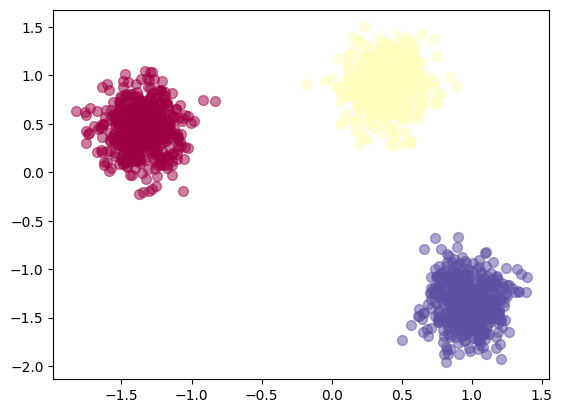

In [13]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = x[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = x[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

# For Weather Dataset

In [27]:
import csv
import pandas as pd
import numpy as np

pdf = pd.read_csv('weather-stations.csv')
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


### Modelling

In [33]:
dataset = pdf[['Tm','Long']]
dataset = np.nan_to_num(dataset)
dataset = StandardScaler().fit_transform(dataset)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(dataset)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Tm","Long","Clus"]].head(5)

,Tm,Long,Clus
0,8.2,-123.742,0
1,7.0,-124.133,0
2,6.8,-124.052,0
3,NaN,-123.226,0
4,7.7,-123.728,0
